In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import pickle

c:\users\pl156\miniconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\pl156\miniconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
c:\users\pl156\miniconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\users\pl156\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-152268b5638f>", line 4, in <module>
    from keras.models import Sequential
  File "C:\Users\pl156\AppData\Roaming\Python\Python37\site-packages\keras\__init__.py", line 25, in <module>
    from keras import models
  File "C:\Users\pl156\AppData\Roaming\Python\Python37\site-packages\keras\models.py", line 19, in <module>
    from keras import backend
  File "C:\Users\pl156\AppData\Roaming\Python\Python37\site-packages\keras\backend.py", line 39, in <module>
    from tensorflow.python.eager.context import get_config
ImportError: cannot import name 'get_config' from 'tensorflow.python.eager.context' (C:\Users\pl156\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\eager\context.py)

During handling of the above exception, another exception occurred:

In [2]:
#fetch data from csv file

DATASET_DIR = r'C:\Users\pl156\Documents\python creations\machine learning datasets\body fat predictor\bodyfat.csv'
csv_data = pd.read_csv(DATASET_DIR)

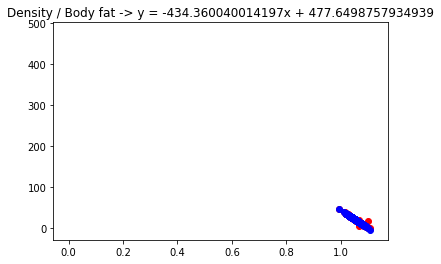

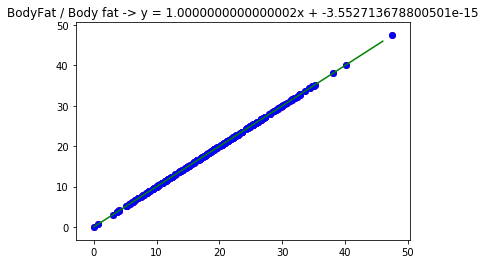

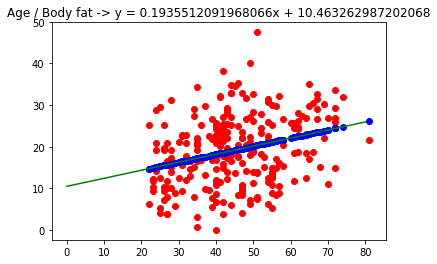

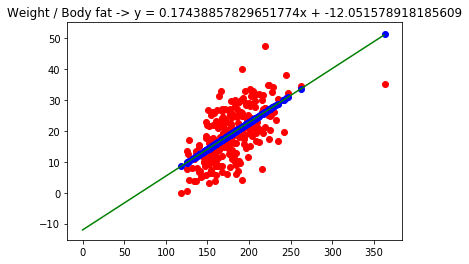

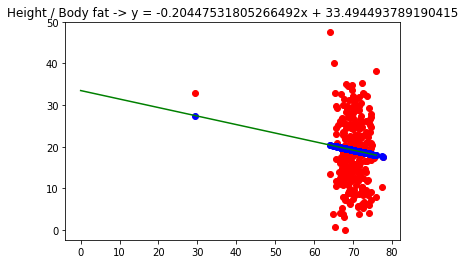

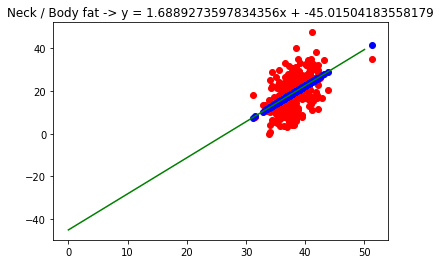

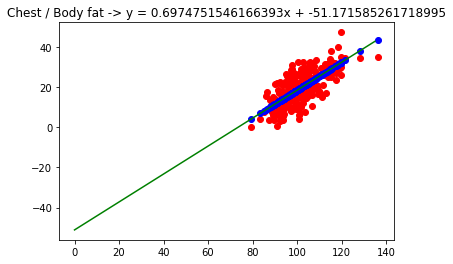

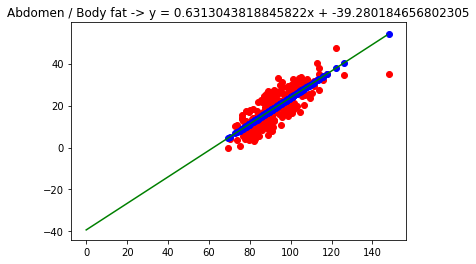

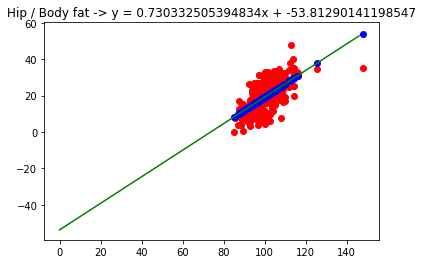

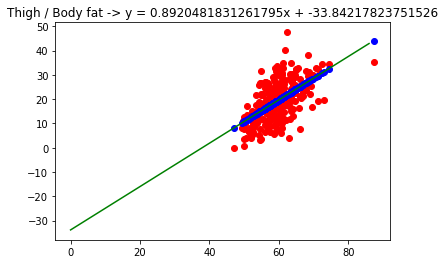

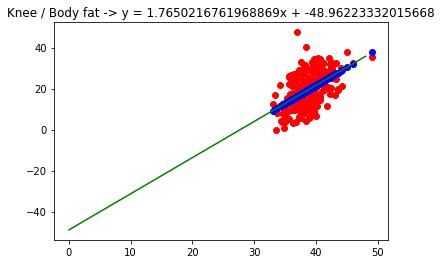

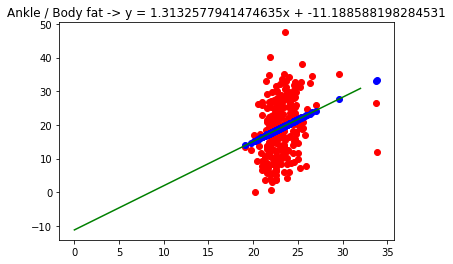

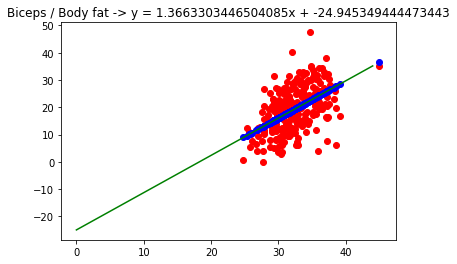

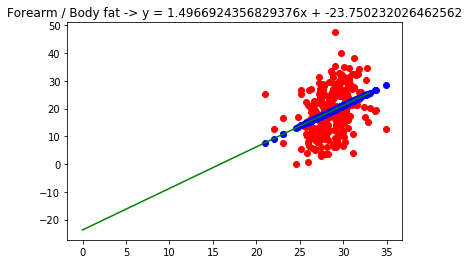

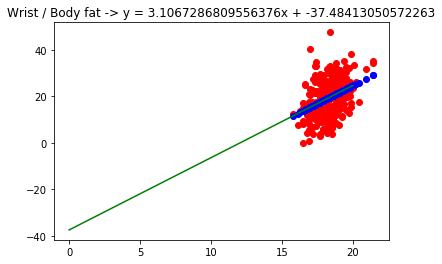

In [3]:
#analyse data from each column separately with simple linear regression


'''
    Columns that show strong correlation:
        -> Weight
        -> Chest 
        -> Abdomen - greatest correlation, due to lowest deviance from line of best fit
        -> Hip
'''

regression_instance = LinearRegression(fit_intercept = True)

for header in csv_data.columns:
    regression_instance.fit(np.array(csv_data[header]).reshape(-1, 1), np.array(csv_data['BodyFat']).reshape(-1, 1))
    m, c = regression_instance.coef_[0][0], regression_instance.intercept_[0]
    
    plt.scatter(csv_data[header], csv_data['BodyFat'], color = 'r')
    plt.scatter(csv_data[header], regression_instance.predict(np.array(csv_data[header]).reshape(-1, 1)), color = 'b')
    plt.plot([(m * x) + c for x in range(0, int(max(csv_data[header])))], color = 'g')
    plt.title(f'{header} / Body fat -> y = {m}x + {c}')
    plt.show()

In [4]:
#extract parameters that show strong correlation and create parameters array, 
#then scale the data in this array between zero and one


weights, chest_circumferences, abdomen_circumferences, hip_circumferences = np.array(csv_data['Weight']), np.array(csv_data['Chest']), np.array(csv_data['Abdomen']), np.array(csv_data['Hip'])

grouped_data = np.array([np.array([weight, chest_circumference, abdomen_circumference, hip_circumference]) 
                for weight, chest_circumference, abdomen_circumference, hip_circumference in 
                zip(weights, chest_circumferences, abdomen_circumferences, hip_circumferences)])

x_scaler = MinMaxScaler()
x_scaler.fit(grouped_data)
scaled_data = x_scaler.transform(grouped_data)